In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.cluster import KMeans

In [16]:
wcss = []
for i in range(1,10):
    m_kmeans = KMeans(n_clusters=i, init='k-means++')
    m_kmeans.fit(df)
    wcss.append(m_kmeans.inertia_)
print(wcss)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[17592296.383508474, 4543749.614531861, 2370689.6867829678, 1331903.0622637183, 916379.187153917, 647326.0020260848, 412137.50910045835, 323211.5526346544, 270144.0019534499]


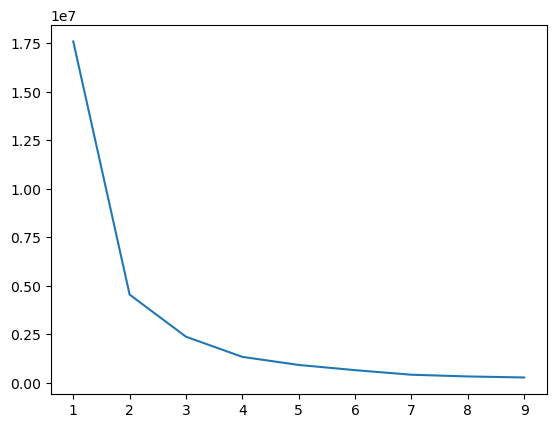

In [17]:
plt.plot(range(1,10),wcss)

In [18]:
#From elblow point wee optimal number of clusters is3 or 4. Lets confirm the same by analyzing their Silhoutte score

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [20]:
possible_number_of_clusters = [3,4]
for i in possible_number_of_clusters:
    km=KMeans(n_clusters=i, init='k-means++')
    y=km.fit_predict(df)
    sil_score=silhouette_score(df,y)
    print(f"Average Silhouette score for {i} clusters is: {sil_score}")

Average Silhouette score for 3 clusters is: 0.571138193786884
Average Silhouette score for 4 clusters is: 0.5605941060060623


In [22]:
# Since Silhoutte scores for both samples are good, we go with the higher number of clusters i.e. 4 in this case as it generalizes well
km = KMeans(n_clusters = 4, init = 'k-means++')
y_pred = km.fit_predict(df)

df['pred'] = y_pred

In [23]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,pred
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [25]:
df_melted=df.melt('Alcohol', var_name = 'col', value_name='vals')
df_melted

,Alcohol,col,vals
0,14.23,Malic_Acid,1.71
1,13.20,Malic_Acid,1.78
2,13.16,Malic_Acid,2.36
3,14.37,Malic_Acid,1.95
4,13.24,Malic_Acid,2.59
...,...,...,...
2309,13.71,pred,3.00
2310,13.40,pred,3.00
2311,13.27,pred,3.00
2312,13.17,pred,3.00


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic_Acid'>

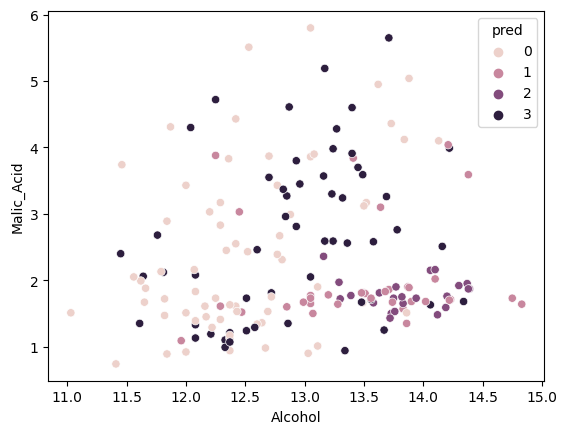

In [33]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,1], hue = df.iloc[:,-1])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Ash'>

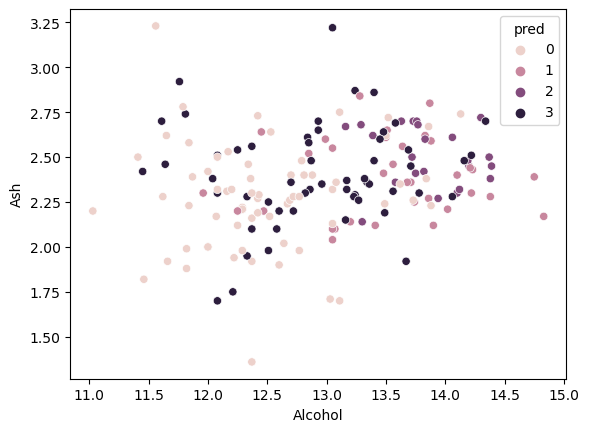

In [34]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,2], hue = df.iloc[:,-1])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Ash_Alcanity'>

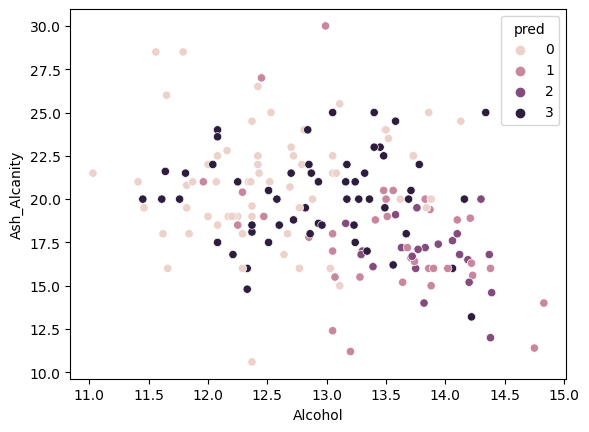

In [35]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,3], hue = df.iloc[:,-1])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Magnesium'>

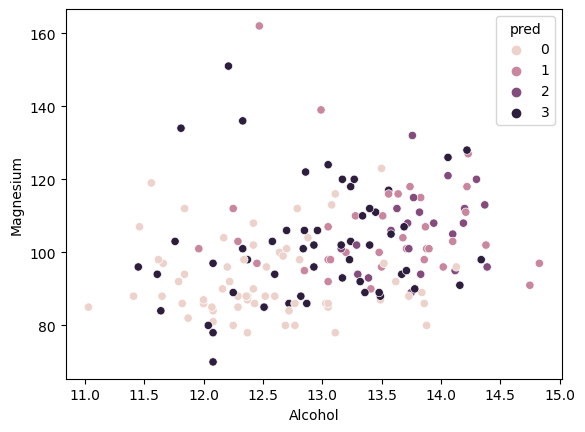

In [36]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,4], hue = df.iloc[:,-1])